In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [3]:
bms=pd.read_csv("marketplace.csv")
bms.head()

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,3/11/2020,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
1,3/26/2020,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2,3/23/2020,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
3,4/29/2020,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
4,4/15/2020,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


## 1. Berapa banyak observasi yang ada dalam dataset? Dan kolom mana yang tidak memiliki nilai duplikat / nilai unik?

In [4]:
bms.shape

(26014, 16)

In [5]:
dup = bms.duplicated()
print(dup.sum())
bms[dup]

0


,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold


In [6]:
any(bms['sku_name'].duplicated())

True

In [7]:
any(bms['product_id'].duplicated())

True

In [8]:
any(bms['merchant_city'].duplicated())

True

## 2. Periksa tipe data dalam dataset. Lakukan beberapa perubahan tipe data jika ada tipe data yang salah

In [9]:
bms.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,26007.000000,2.601400e+04,26014.000000,2.601400e+04,26014.000000,26014.000000,26014.000000,26014.000000,26014.000000
mean,1562.011112,3.890569e+06,344553.702083,1.582145e+06,0.737257,58.814331,98.339279,46.343969,152.429807
std,1041.170081,3.868790e+06,474104.795100,1.603716e+07,7.453432,473.091001,5.485507,91.149600,321.367828
min,1.000000,5.350000e+05,0.000000,-2.342700e+08,-82.000000,0.000000,0.000000,0.000000,0.000000
25%,854.000000,1.770000e+06,4.000000,0.000000e+00,0.000000,2.000000,98.000000,10.000000,27.000000
50%,1252.000000,2.599999e+06,37.000000,0.000000e+00,0.000000,5.000000,100.000000,24.000000,63.000000
75%,2287.000000,4.093925e+06,999972.000000,0.000000e+00,0.000000,21.000000,100.000000,44.000000,144.000000
max,4247.000000,5.000000e+07,999999.000000,9.415350e+08,441.000000,38993.000000,100.000000,2842.000000,7724.000000


In [10]:
bms.dtypes

date               object
sku_name           object
product_id         object
merchant_code     float64
merchant_badge     object
product_type       object
merchant_city      object
cod                  bool
price               int64
stock               int64
daily_gmv           int64
daily_sold          int64
daily_view          int64
rating              int64
total_review        int64
total_sold          int64
dtype: object

In [11]:
bms["date"] = bms["date"].astype('datetime64')
bms.dtypes

date              datetime64[ns]
sku_name                  object
product_id                object
merchant_code            float64
merchant_badge            object
product_type              object
merchant_city             object
cod                         bool
price                      int64
stock                      int64
daily_gmv                  int64
daily_sold                 int64
daily_view                 int64
rating                     int64
total_review               int64
total_sold                 int64
dtype: object

In [12]:
bms.sort_values(by=["date"])

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
0,2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
6467,2020-03-11,Samsung J6+ 3/32 Garansi Resmi - Hitam,C544,1878.0,PM,Samsung Galaxy J6,Kota Administrasi Jakarta Timur,False,2200000,999992,0,0,0,100,46,136
6463,2020-03-11,Samsung Galaxy J6 (4/64),C543,1266.0,PM,Samsung Galaxy J6,Kota Surabaya,False,2500000,999999,0,0,0,100,21,35
6452,2020-03-11,INFINIX HOT 7 PRO 6/64 GARANSI RESMI INFINIX -...,E1183,1869.0,PM,Infinix Hot 7 Pro,Kota Administrasi Jakarta Utara,False,2000000,999954,0,0,0,100,52,259
6444,2020-03-11,hp xiaomi mi mix 2s,D649,1866.0,PM,Xiaomi Mi Mix 2S,Kota Sukabumi,False,5100000,999941,0,0,0,100,34,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2020-04-30,Realme X2 Pro 12GB / 256GB 12 GB / 256 GB Whit...,F20,47.0,RM,Realme 6,Kota Administrasi Jakarta Barat,False,7110000,32,0,0,53,98,72,75
2545,2020-04-30,iPhone 256GB X (s) Max Garansi Resmi Apple 1 T...,C323,240.0,RM,Apple iPhone XS Max,Kota Surabaya,False,17250000,999999,0,0,3,100,11,45
18994,2020-04-30,READY STOCK iPhone Jet Black 7 PLUS 256 gb ORI...,B567,2354.0,PM,Apple iPhone 7 Plus,Kota Administrasi Jakarta Barat,False,12600000,999999,0,0,1,100,4,9
18747,2020-04-30,iphone 6plus,D1848,3682.0,PM,Apple iPhone 6 Plus,Kab. Jember,False,4000000,999987,0,0,3,100,8,19


## 3. Apakah ada nilai dalam variabel yang nol? Yang mana Jika ada beberapa variabel null pada dataset tersebut, silahkan isi nilainya dengan 0

In [13]:
bms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26014 entries, 0 to 26013
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26014 non-null  datetime64[ns]
 1   sku_name        26014 non-null  object        
 2   product_id      26014 non-null  object        
 3   merchant_code   26007 non-null  float64       
 4   merchant_badge  26014 non-null  object        
 5   product_type    26014 non-null  object        
 6   merchant_city   26014 non-null  object        
 7   cod             26014 non-null  bool          
 8   price           26014 non-null  int64         
 9   stock           26014 non-null  int64         
 10  daily_gmv       26014 non-null  int64         
 11  daily_sold      26014 non-null  int64         
 12  daily_view      26014 non-null  int64         
 13  rating          26014 non-null  int64         
 14  total_review    26014 non-null  int64         
 15  to

In [14]:
bms.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

In [15]:
bms["merchant_code"]=bms["merchant_code"].fillna(0)

In [16]:
bms.isnull().sum()

date              0
sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

## 4. Apa jenis produk kategori yang dijual dalam kumpulan data

In [17]:
# mendapatkan jumlah nilai unik
bms['product_type'].value_counts()

Realme 6                          2161
Samsung Galaxy A10s               1062
Xiaomi Redmi Note 8               1025
Xiaomi Redmi 7A                    860
Xiaomi Redmi 6A                    747
                                  ... 
Asus ZenFone Lite (L1) ZA551KL       1
Huawei P10 Plus                      1
vivo Y51                             1
vivo Z1                              1
Asus Zenfone 3 Max ZC553KL           1
Name: product_type, Length: 361, dtype: int64

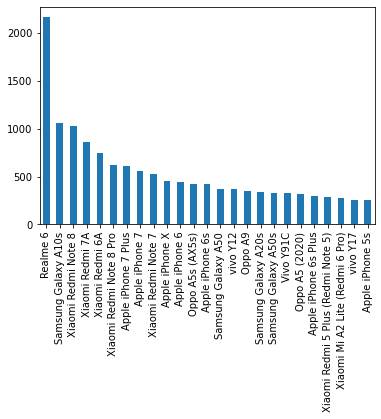

In [18]:
bms["product_type"].value_counts().head(25).plot(kind="bar")

## 5. Jenis produk apa yang termasuk dalam 3 produk teratas dalam penjualan?

In [19]:
treeUp = bms.groupby("product_type")['total_sold'].sum().sort_values(ascending = False)
treeUp.head(3)

product_type
Samsung Galaxy A10s    525852
Xiaomi Redmi 6A        332426
Realme 6               277352
Name: total_sold, dtype: int64

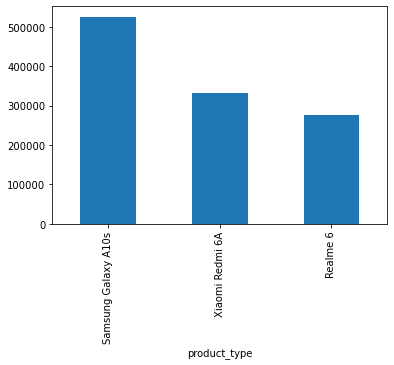

In [20]:
treeUp.head(3).plot(kind="bar")

## 6. Produk teratas pertama: harga rata-rata, variasi harga jual visualisasi distribusi dengan histogram

In [21]:
treeUp.head(1)

product_type
Samsung Galaxy A10s    525852
Name: total_sold, dtype: int64

In [22]:
samsung = bms[bms['product_type'] == 'Samsung Galaxy A10s']
samsung

,date,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
2554,2020-04-08,Samsung A10S 2/32 garansi resmi - Random,E159,676.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1581000,0,1581000,1,19,100,50,186
2555,2020-04-26,SAMSUNG GALAXY A10S 2GB 32GB GARANSI RESMI SEIN,E160,43.0,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1650000,17,0,0,2,99,25,26
2556,2020-04-18,Samsung A10s New Garansi Resmi,F122,677.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,2,100,21,73
2557,2020-04-15,SAMSUNG GALAXY A10S - [2/32] - GARANSI RESMI S...,E161,678.0,RM,Samsung Galaxy A10s,Kota Administrasi Jakarta Utara,False,1589900,3,0,0,11,100,21,329
2558,2020-04-14,Samsung A10s New Garansi Resmi,F122,677.0,RM,Samsung Galaxy A10s,Kab. Bantul,False,1609400,10,0,0,7,100,21,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,2020-04-04,Samsung Galaxy A10s 2/32 RAM 2GB ROM 32GB GARA...,E3287,805.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1621000,7,25936000,16,565,98,529,4100
25327,2020-04-06,Samsung Galaxy A10s 2/32 2GB 32GB Garansi Resm...,E328,819.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1650000,8,3300000,2,236,94,35,241
25328,2020-04-18,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Red...,E324,822.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1629000,18,3258000,2,32,98,36,203
25329,2020-04-27,Samsung Galaxy A10S Smartphone [32GB/ 2GB] Bla...,E3281,822.0,OS,Samsung Galaxy A10s,Kota Administrasi Jakarta Pusat,False,1635000,20,0,0,663,99,203,1431


In [23]:
samsung.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,1062.000000,1.062000e+03,1062.000000,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,2091.317326,1.622651e+06,10479.354049,5.119869e+06,3.180791,44.287194,98.691149,52.347458,495.152542
std,915.227777,4.856473e+04,101278.453939,2.278007e+07,14.239942,129.024256,2.087776,67.491241,626.638576
min,43.000000,1.575000e+06,0.000000,-5.286600e+07,-33.000000,0.000000,77.000000,1.000000,7.000000
25%,1593.250000,1.600000e+06,2.000000,0.000000e+00,0.000000,3.000000,98.000000,19.000000,120.250000
50%,2039.000000,1.610000e+06,4.000000,0.000000e+00,0.000000,9.000000,99.000000,33.000000,291.500000
75%,2135.000000,1.625000e+06,10.000000,1.617750e+06,1.000000,26.750000,100.000000,56.750000,611.250000
max,3894.000000,2.000000e+06,999960.000000,3.845380e+08,242.000000,1467.000000,100.000000,570.000000,4290.000000


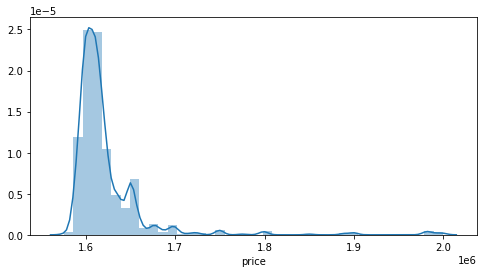

In [36]:
plt.figure(figsize=(8, 4))
sns.distplot(samsung['price'], bins=40)

## 7. Filter dataset hanya dengan 'Samsung Galaxy A10s' dan temukan 3 kota pedagang terlaris. Tunjukkan dengan beberapa boxplot distribusi harga antara kota pedagang tersebut

In [26]:
samsung.groupby('merchant_city')['total_sold'].sum().sort_values(ascending = False).head(3)

merchant_city
Kota Administrasi Jakarta Pusat    71373
Kab. Sleman                        57790
Kab. Bantul                        46091
Name: total_sold, dtype: int64

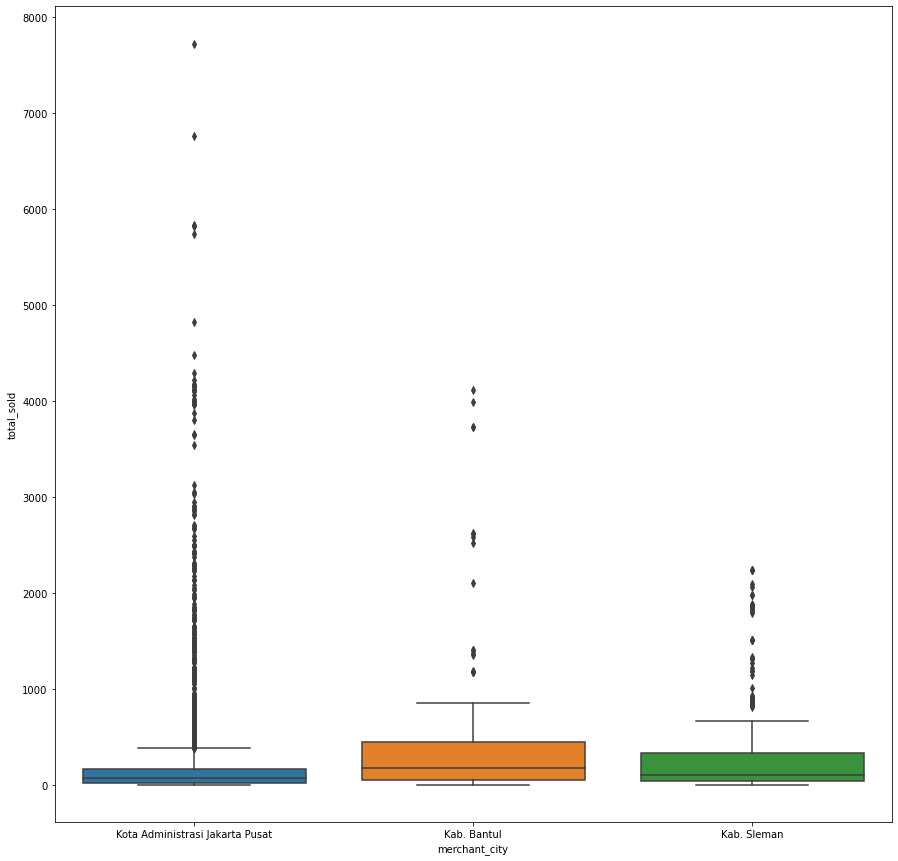

In [31]:
treeCity = ['Kota Administrasi Jakarta Pusat', 'Kab. Sleman', 'Kab. Bantul']
filterCity = bms[bms['merchant_city'].isin(treeCity)]
plt.figure(figsize=(15,15))
box = sns.boxplot(x='merchant_city', y='total_sold', data=filterCity)

## 8. Ujilah perbedaan total_sold produk Samsung Galaxy A10 dengan Xiaomi Redmi 6A menggunakan t-sample test

In [32]:
#melakukan uji t-test 2 sampel. antara Samsung Galaxy A10 dan Redmi 6A
from scipy.stats import ttest_ind
produk_samsung = bms[bms['product_type']=='Samsung Galaxy A10s']['total_sold']
produk_redmi = bms[bms['product_type']=='Xiaomi Redmi 6A']['total_sold']
samsung_mean = np.mean(produk_samsung)
redmi_mean = np.mean(produk_redmi)
print("samsung mean value:",samsung_mean)
print("redmi mean value:",redmi_mean)
samsung_std = np.std(produk_samsung)
redmi_std = np.std(produk_redmi)
print("samsung std value:",samsung_std)
print("redmi std value:",redmi_std)
ttest,pval = ttest_ind(produk_samsung,produk_redmi)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

samsung mean value: 495.1525423728813
redmi mean value: 445.0147255689424
samsung std value: 626.3434790554674
redmi std value: 580.394664272472
p-value 0.08442284533312362
we accept null hypothesis


## 9. Kesimpulan

Data ini merupakan data penjualan produk handphone. Menurut data penjualan terjadi pada 11-03-2020 s/d 30-04-2020 kurang lebih selama dua bulan. Beberapa merk handphone yang terjual di seluruh indonesia. Ternyata merk handphone yang banyak terjual pertama Samsung Galaxy A10S sebanyak 525.852, kedua Xiaomi Redmi 6A sebanyak 332.426, dan ketiga Realme 6 sebanyak 277.352.
Pada Samsung Galaxy A10S terdepat 3 daerah yang mana penjualan hanphone ini paling laris, pertama Kota Administrasi Jakarta Pusat terjual 71.373, kedua Kab. Sleman terjual 57.790, ketiga Kab. Bantul terjual 46091.
Sekarang mencoba membandingkan antara Samsung Galaxy A10 dengan Xiaomi Redmi 6A. Untuk rata-rata hingga standart deviasi penjualan samsung lebih unggul daripada redmi